# BLU1 - Pandas for timeseries and multi-indexing 

## 1. A bit of housekeeping before we get started

Welcome to timeseries! 

Here we will learn how to explore datasets which depend on time. As you might imagine, many processes datasts in the real world are timeseries. The stockmarket springs to mind, but also anything to do with sales or marketing, engineering processes (when will this particular turbine break, you may ask?), medical processes (what is the effect of this medication over time), and so many, many more. 

Now, timeseries are a less settled field than most things you've learned so far. There are many ways of doing things, and different schools of thought fighting to get _"followers"_. Our objective here is to avoid indoctrination, but rather to give you a bit of exposure to the super-basics of how to handle timeseries data, and making some basic but useful predictions. We will in no way try to teach you everything, but rather enough to get your hands dirty. From then on, there is the good old fashioned documentation, and hacking around. 

Speaking of covering only the basics, as you might know Neural Networks are becoming increasingly prevalent in the prediction of timeseries. While this is a very exciting topic, we've decided not to include Neural Networks in the Academy, for three main reasons:
1. We want to make sure you gain a sold technical base, on which you can then later add NNs, rather than have you "run before you can walk" 
2. Teaching NNs is slow, as to be understood correctly there are a lot of quicks and "best practice" things to know, which don't necessarily have the most scientific of basis (it's still mostly an empirical field), so they do not fit well into the "basic intuition followed by practice" approach of the Academy 
3. There are already EXCELLENT resources to learn NNs, namely [Andrew NGs course on Coursera](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwjVmcT5wtbaAhXHuRQKHc2yD2wQFggpMAA&url=https%3A%2F%2Fwww.coursera.org%2Fspecializations%2Fdeep-learning&usg=AOvVaw3vIqYhrM-dZQd6HUBci4QA), which are best approached after a solid technical foundation have been laid. 

Lastly, remember that time-series are notoriously tricky to evaluate. While with "static" data we can trust a few metrics and for the most part be done with it (yay _roc auc_!), in time-series the metrics tend to be more problem specific. The thing to remember is: your problems will be extra sneaky, and you will have to be extra careful. As a corolary to this, when you think you've predicted the stockmarket... you probably haven't. 

And now, let the fun begin! 

## Pandas for Timeseries 

In this BLU we will not learn any fancy prediction stuff, but rather how to wrangle timeseries data. 

Imports: 

In [53]:
import pandas as pd 
from matplotlib import pyplot as plt 
% matplotlib inline 

#### Timestamps 

The timestamp is the most basic form of time series indexer that Pandas has. It does exactly what the name describes: marks the exact moment in which the data was collected. 

While kaggle datasets and other online challenges are normally clean "hourly" or "daily" dataset, TimeStamps are how most data is normally collected in the wild! 

An event happens, and the time of the even is dumped into a database. 

One example of this would be... bitcoin! Now, whatever you may think about bitcoin, _(whether it is a ponzi scheme or a perfectly legitimate way to destroy the enviroment while helping organ trafickers and kidnappers launder money)_, it is an excellent source of high-granularity data. Let's dive in! 

In [86]:
data = pd.read_csv('data/bitcoin/coinbaseUSD_1-min_data_2014-12-01_to_2018-03-27.csv')

Let's take a look:

In [87]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-12-01 05:33:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,2014-12-01 05:34:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2,2014-12-01 05:35:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
3,2014-12-01 05:36:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
4,2014-12-01 05:37:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0


Interesting. We have this `Timestamp` column, that we can kind of parse by looking at it. 

In [88]:
data.Timestamp.head()

0    2014-12-01 05:33:00
1    2014-12-01 05:34:00
2    2014-12-01 05:35:00
3    2014-12-01 05:36:00
4    2014-12-01 05:37:00
Name: Timestamp, dtype: object

We can kind of understand this. Looks like Year, month, and day, then a T, then hours, minutes, then seconds, then a Z...  

Let's inspect a random row: 

In [89]:
print('One of the times in our dataset: %s' % data.Timestamp.iloc[3])
print('Type of the Series (data.Time):  %s' % data.Timestamp.dtype)
print('Type of a particular time:       %s' % type(data.Timestamp.iloc[3]))

One of the times in our dataset: 2014-12-01 05:36:00
Type of the Series (data.Time):  object
Type of a particular time:       <class 'str'>


Ah, so these are just strings. How boring. 

However, pandas can do something pretty amazing with these strings: 

In [90]:
time_as_a_timestamp = pd.to_datetime(data.Timestamp, infer_datetime_format=True)

What is it now? 

In [97]:
time_as_a_timestamp.head(2)

0   2014-12-01 05:33:00
1   2014-12-01 05:34:00
Name: Timestamp, dtype: datetime64[ns]

It is a `datetime64[ns]`, which I shall for the sake of simplicity just refer to as a TimeStamp. 

What can we do with this? Well, for one thing, extracting days, months etc is trivial:

In [98]:
time_as_a_timestamp.dt.day.head(2)

0    1
1    1
Name: Timestamp, dtype: int64

Notice the nomenclature. `Series.dt.<whatever I want>`. 

And we can want [just about anything we can think of!](https://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties)

In [100]:
# I'll make a little dataset so that we can see some of the results side by side
new = pd.DataFrame()
new['date'] = time_as_a_timestamp
new['day'] = new['date'].dt.day
new['month'] = new['date'].dt.month
new['year'] = new['date'].dt.year
new['hour'] = new['date'].dt.hour
new['minute'] = new['date'].dt.minute
new['second'] = new['date'].dt.second
new['day of the week'] = new['date'].dt.weekday
new['day of the week name'] = new['date'].dt.weekday_name
new['quarter'] = new['date'].dt.quarter
new['is it a leap year?'] = new['date'].dt.is_leap_year

new.head(2)

,date,day,month,year,hour,minute,second,day of the week,day of the week name,quarter,is it a leap year?
0,2014-12-01 05:33:00,1,12,2014,5,33,0,0,Monday,4,False
1,2014-12-01 05:34:00,1,12,2014,5,34,0,0,Monday,4,False


Pandas... is amazing. 

### Different date formats 

Now you may be thinking _"hang on, was that just because the strings were exactly in the way Pandas likes them?"_

It's a fair question, and the answer is No. Pandas' [`to_datetime`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) has an `infer_datetime_format` argument which is amazingly good, and can for the most part figure out what you need from it. 

Let's put it to the test: 

In [101]:
# little function to sanity check our dates
def sanity_check(dates):
    
    inferred_dates = pd.to_datetime(dates, infer_datetime_format=True)
    
    print('Our first day is   5,    and was infered as %0.0f' % inferred_dates.iloc[0].day)
    print('Our first month is 4,    and was infered as %0.0f' % inferred_dates.iloc[0].month)
    print('Our first year is  2007, and was infered as %0.0f' % inferred_dates.iloc[0].year)

Let's start with an easy one 

In [102]:
american_dates = pd.Series(['04/05/2007',  # <-- April 5th, 2007
                            '04/13/2006', 
                            '12/27/2014'])

sanity_check(american_dates)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


Can we separate them with hyphens? 

In [103]:
hyphen_separated_dates = pd.Series(['04-05-2007',  # <-- April 5th, 2007
                            '04-13-2006', 
                            '12-27-2014'])

sanity_check(hyphen_separated_dates)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


Let's write the year in a weird way

In [106]:
short_year = pd.Series(['04-05-07',  # <-- April 5th, 2007
                        '04-13-06', 
                        '12-27-14'])

sanity_check(short_year)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


Eh... english? 

In [108]:
dates_in_english = pd.Series(['April 5th, 2007',  # <-- April 5th, 2007
                            'April 13th, 2006', 
                            'December 27th, 2014'])

sanity_check(dates_in_english)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


Wow! So, european dates should be easy... right? 

In [116]:
european_dates = pd.Series(['05/04/2007',   # <-- April 5th, 2007
                            '13/04/2006', 
                            '27/12/2014'])

sanity_check(european_dates)

Our first day is   5,    and was infered as 4
Our first month is 4,    and was infered as 5
Our first year is  2007, and was infered as 2007


Wait... what? 

It turns out Pandas can infer lots of things, but Europe isn't it's strenght. Even though the second and third line clearly indicate that the month is in the middle (the 13'th can't be a month), it still gets confused. 

And here is where line 2 of [The Zen of Python](https://www.python.org/dev/peps/pep-0020/#id3) comes in:
> Explicit is better than implicit 

In [119]:
inferred_dates = pd.to_datetime(european_dates, 
                                dayfirst=True)  # <--- explicit! 

In [120]:
print('Our first day is   5,    and was infered as %0.0f' % inferred_dates.iloc[0].day)
print('Our first month is 4,    and was infered as %0.0f' % inferred_dates.iloc[0].month)
print('Our first year is  2007, and was infered as %0.0f' % inferred_dates.iloc[0].year)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


_(disclaimer: I wanted to use [this quote](http://www.blog.indiareads.com/wp-content/uploads/2015/06/arthur-weasley-harry-potter.jpg), but the Zen of Python seemed more appropriate)_

By being explicit, we can parse arbitrarily crazy dates:

In [128]:
dates_in_quackland = pd.Series(['05_quack_2007$04',   # <-- April 5th, 2007, in quack_timesystem
                                '13_quack_2006$04',    
                                '27_quack_2014$12'])

inferred_dates = pd.to_datetime(dates_in_quackland, 
                                format='%d_quack_%Y$%m')  # <--- %d is day, %m is month, %Y is 4 digit year

print('Our first day is   5,    and was infered as %0.0f' % inferred_dates.iloc[0].day)
print('Our first month is 4,    and was infered as %0.0f' % inferred_dates.iloc[0].month)
print('Our first year is  2007, and was infered as %0.0f' % inferred_dates.iloc[0].year)

Our first day is   5,    and was infered as 5
Our first month is 4,    and was infered as 4
Our first year is  2007, and was infered as 2007


Geeks among us will be thinking _"That's all good and fine, but [real programmers](https://xkcd.com/378/) use time since epoch!"_

Well fear not, Pandas has got you covered. 

In [206]:
dev_time = inferred_dates.astype(int)  # our inferred dates were datetime objects, remember? 
dev_time

0    1175731200000000000
1    1144886400000000000
2    1419638400000000000
dtype: int64

And to convert back? 

In [207]:
pd.to_datetime(dev_time)

0   2007-04-05
1   2006-04-13
2   2014-12-27
dtype: datetime64[ns]

In [ ]:
## Selecting 

Now, back to our data. Let's try to ask some useful questions, such as 
> "_How has the price of bitcoin varied over time?_"

In [130]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-12-01 05:33:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,2014-12-01 05:34:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2,2014-12-01 05:35:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
3,2014-12-01 05:36:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
4,2014-12-01 05:37:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0


Let's start by making the timestamp the index. This is common good practice, for reasons we shall soon see. 

In [133]:
data.set_index(pd.to_datetime(data.Timestamp, infer_datetime_format=True), 
               inplace=True) 

Also good practice once you have your datetime index, is to sort it. 

In [134]:
data.sort_index(inplace=True)

In [145]:
print('We have data between %s and %s' % (data.index.min(), data.index.max()))

We have data between 2014-12-01 05:33:00 and 2018-03-27 00:00:00


So we know that somewhere about [Jan 17th, bitcoin crashed pretty hard](https://www.cnbc.com/2018/01/17/bitcoin-tests-important-price-level-after-dramatic-plunge.html). Let's try to select that time. 

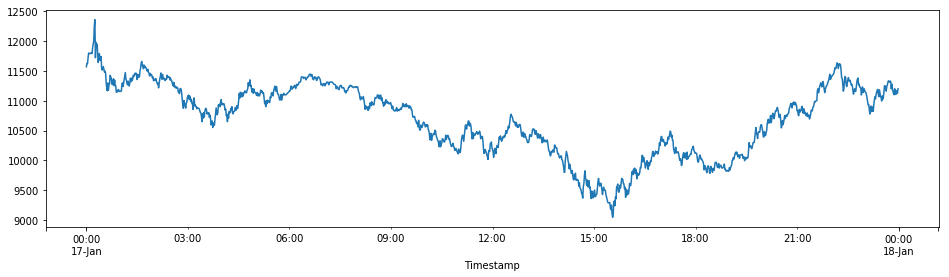

In [191]:
data['Jan 17th 2018'].Close.plot(figsize=(16, 4));  # <--- wait, you can do that???

Kind of cool way of selecting, right? How was Januarty in general? 

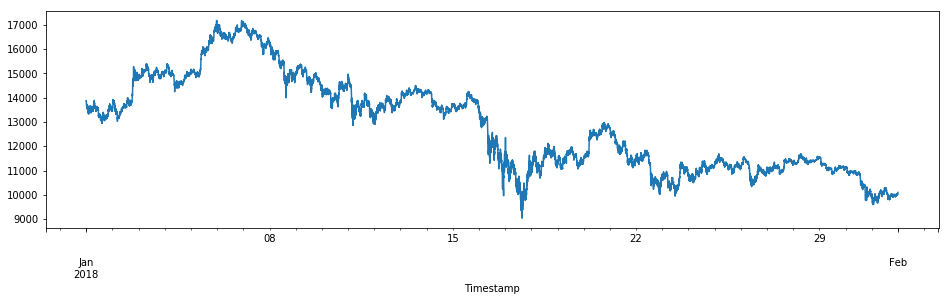

In [192]:
data['Jan 2018'].Close.plot(figsize=(16, 4)); # <--- what??? naaah...

Let's see those days between the 15th and the 22nd. Let's select in a different way, for the sake of giggles. 

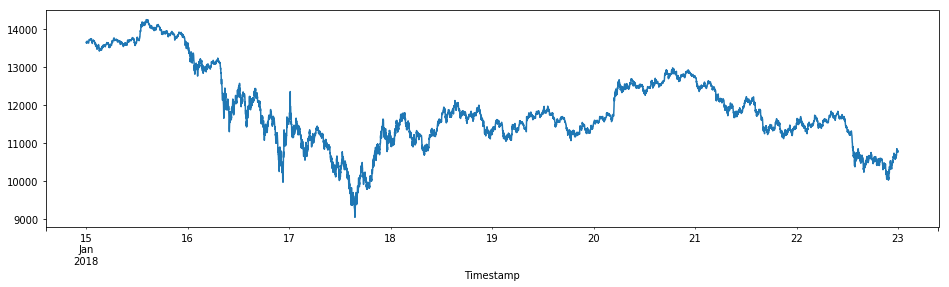

In [193]:
data['01/15/2018':'01/22/2018'].Close.plot(figsize=(16, 4));  # <--- remember, American dates are less error prone in Pandas 

Interesting. What were things like in high granularity in in that low? From our first chart, we saw it was on the 17th, between 3PM and 4PM 

_(btw there is [lots of stuff on Pandas for Timezones](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-zone-handling), but we won't go into it here. Assume it's [GMT](https://i.imgur.com/84XItMo.gif) for argument's sake)_

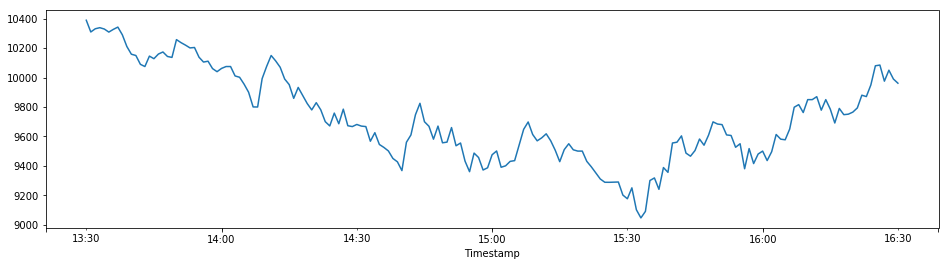

In [195]:
data['01/17/2018 1:30PM':'01/17/2018 4:30PM'].Close.plot(figsize=(16, 4));  # yep, minutes, seconds, up to nanoseconds actually! 

How did traders react? Let's get the volume 

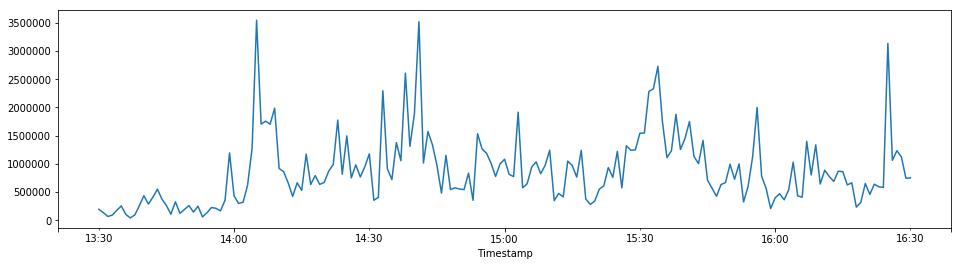

In [196]:
data['01/17/2018 1:30PM':'01/17/2018 4:30PM']['Volume_(Currency)'].plot(figsize=(16, 4));

And here, we reach the limits of our dear Timestamps. 

Let's think about this objectively. The price on Jan 17th, at 3h00m00s makes sense. But the volume "in that moment"? It's a bit non-sensical. Some datasets (this one probably included) will treat data as being "since the last timestamp", but real world data may not be so forgiving. 

Counting using timestamps is like asking _how many people went into McDonnals at an exact moment_. Probably none. It does't tell us much. 

We' think in people "per minute", or "per hour". 

So... Let's get our volume per minute! For this, we can use [resample](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwi3jfnKgNnaAhUGvBQKHRCwBd4QFggpMAA&url=https%3A%2F%2Fpandas.pydata.org%2Fpandas-docs%2Fstable%2Fgenerated%2Fpandas.DataFrame.resample.html&usg=AOvVaw1le9agxvLanaQp9zlNYG9Y)

In our case, we'll resample to every 5 minutes, and take the sum (because we want to sum the volume of those 5 minutes). 

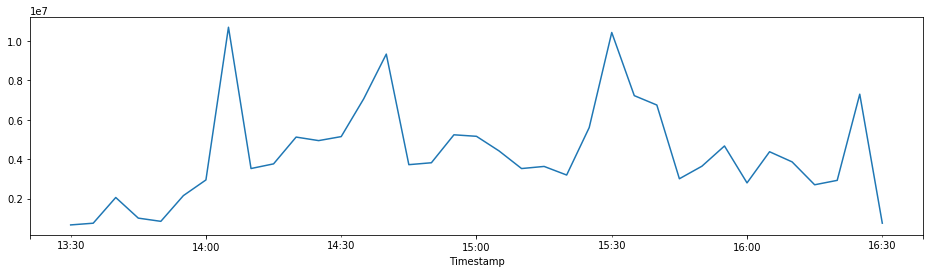

In [213]:
data['01/17/2018 1:30PM':'01/17/2018 4:30PM']['Volume_(Currency)'].resample('5 min').sum().plot(figsize=(16, 4));

Wow! How much money (in dollars) was traded in the largest 10 minute peak?

In [214]:
money = data['01/17/2018 1:30PM':'01/17/2018 4:30PM']['Volume_(Currency)'].resample('10 min').sum().max()

print('In 10 minutes, %0.1f dollars were traded in Bitcoin' % money)

In 10 minutes, 17657576.5 dollars were traded in Bitcoin


We just took the sum, but if we were looking at prices, would that make sense? Probably not, we would resample, and take the mean: 

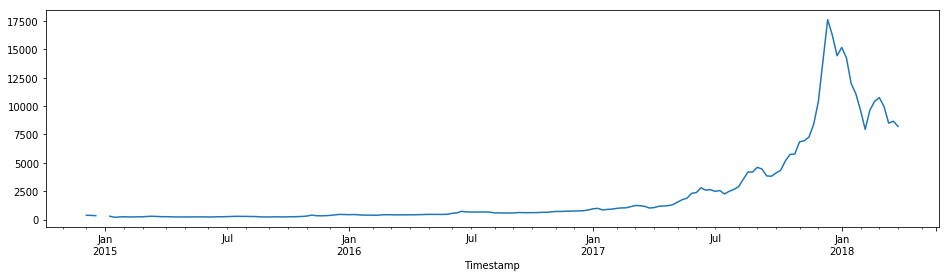

In [215]:
data.resample('w').Close.mean().plot(figsize=(16, 4));  # the mean weekly closing prices, since 2015

Time... is... cool. 

What if we wanted to know the total amount of money that has been traded in bitcoin? 

One way would simply be to sum it, but that does't give us any idea of how that total varied over time: 

In [228]:
data['Volume_(Currency)'].sum()

53505341959.83521

One cooler way to see this over time is to use the cumulative sum:

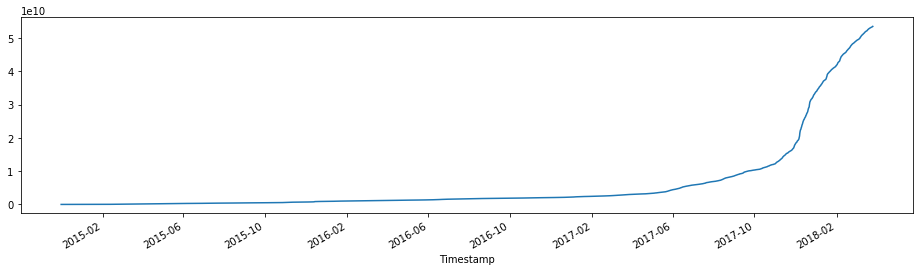

In [227]:
data['Volume_(Currency)'].cumsum().plot(figsize=(16, 4));  # the mean weekly closing prices, since 2015

Another question, what was the the cumulative maximum ever spent in one day?

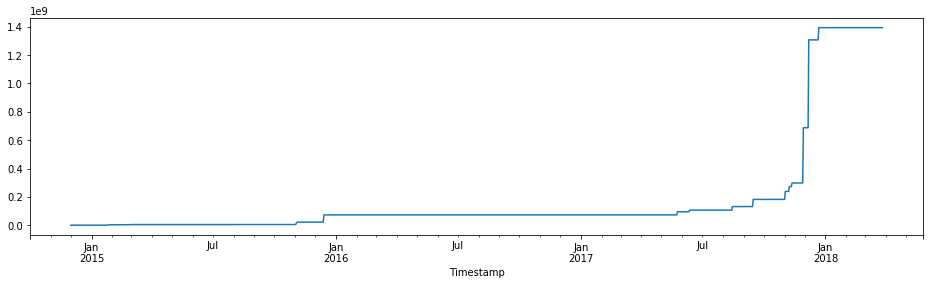

In [234]:
data['Volume_(Currency)'].resample('d').sum().cummax().plot(figsize=(16, 4)); 

A more important question however may be 
> "what were the biggest variations in price?"

For this, we might find it usefull to calculate consecutive differences between periods, using [diff](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.diff.html)

In [220]:
data.Close.diff().head()  # this can take a few seconds to run

Timestamp
2014-12-01 05:33:00    NaN
2014-12-01 05:34:00    0.0
2014-12-01 05:35:00    0.0
2014-12-01 05:36:00    0.0
2014-12-01 05:37:00    0.0
Name: Close, dtype: float64

The first entrance is NaN, which makes sense because it's got no previous day to substract. 

What do the diffs look like? 

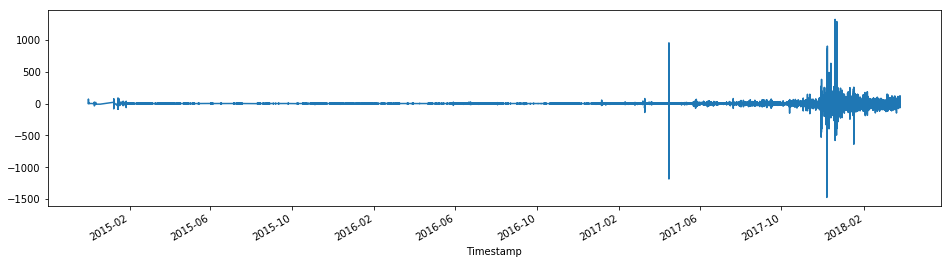

In [221]:
data.Close.diff().plot(figsize=(16, 4));

Not particularly useful. How about on a particular day? 

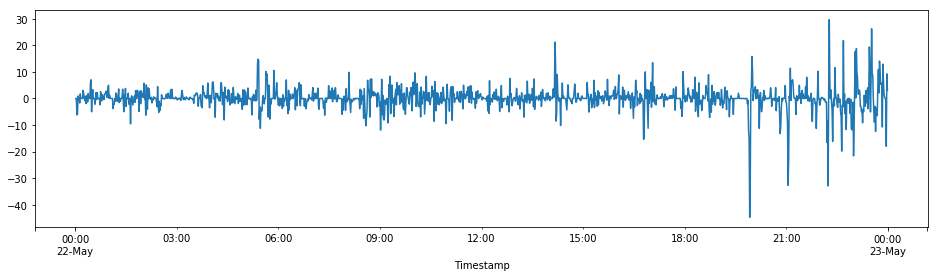

In [222]:
data['May 22nd 2017'].Close.diff(periods=1).plot(figsize=(16, 4));

This is very choppy. One way to deal with this is to look at rolling window. 

This essentially means what it sounds like: we take the mean of the previous X periods. We can choose to center the window (look back and forward), but in general we only want to take into account information from the past, so we should use `center=False` (which is the default)

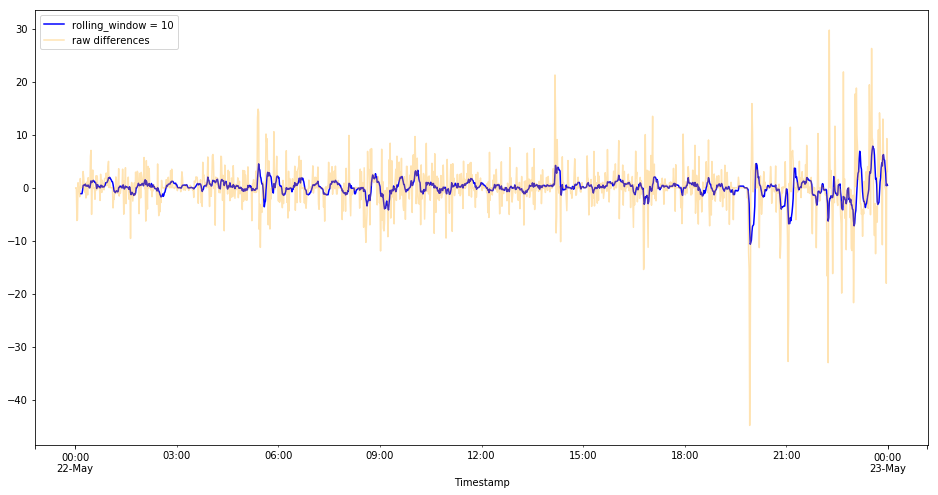

In [296]:
# notice the window size as a parameter of rolling, and the center set to False. Also notice how we use the mean. 
window_size = 10 
rolling_diffs = data['May 22nd 2017'].Close.diff(periods=1).rolling(window=window_size, center=False).mean()

rolling_diffs.plot(figsize=(16, 8), color='b', label='rolling_window = %0.0f' % window_size);

# this is the original one, just for comparison 
data['May 22nd 2017'].Close.diff(periods=1).plot(figsize=(16, 8), label='raw differences', alpha=.3, color='orange');


plt.legend();

Back to the entire  dataset. Let's answer the following question:
> What was the weekly change in price, over time? 

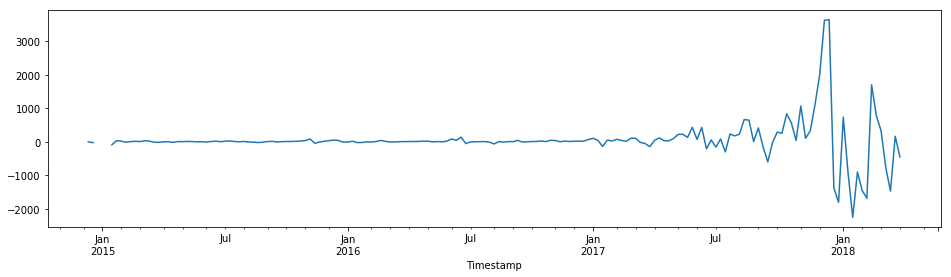

In [235]:
data.resample('w').Close.mean().diff(periods=1).plot(figsize=(16, 4));

We are observing something that makes sense. As the manitude gets bigger, so does the volatility. It makes more sense for bitoin to go down \$100 in a week when it as \$5000 than when it is at \$20. 

What we actually want... is the percent change. 

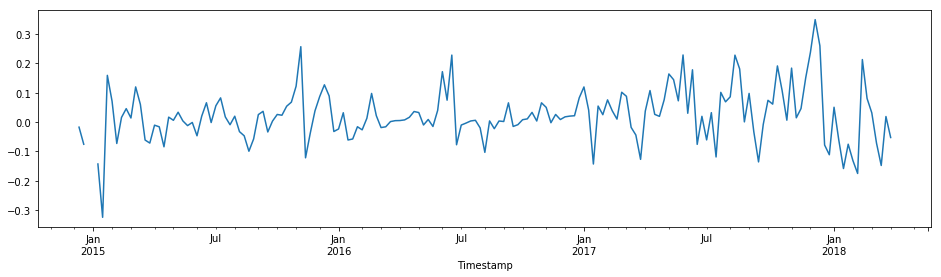

In [236]:
data.resample('w').Close.mean().pct_change().plot(figsize=(16, 4));

Interetingly enough, this chart seems to tell us that while bitcoin varies a lot, it is relatively consistent, with weekly variations of +/- 30% being as big as it gets. As the magnitude becoming larger it becomes more newsworthy _"up one thousand dollars!!!"_, but the underlying percent change does't seem so radically altered. 

In [245]:
import matplotlib 
from matplotlib import pyplot as plt 

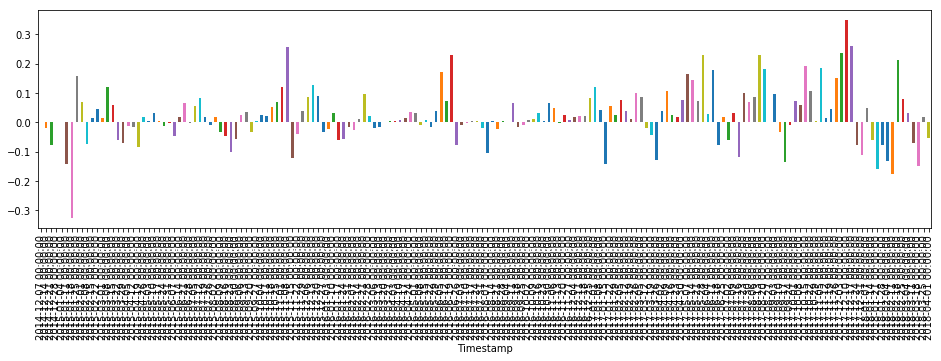

In [255]:
data.resample('w').Close.mean().pct_change().plot(kind='bar', figsize=(16, 4));

Wow that is one ugly X axis. Unfortunately this is a [known issue](https://stackoverflow.com/questions/19143857/pandas-bar-plot-xtick-frequency?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa) with Pandas, and when it happens, there is a bit chart junk copy pasting around to be done. 

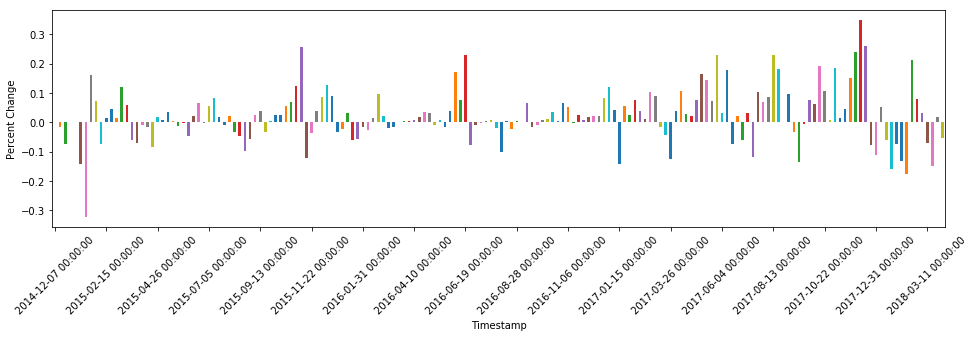

In [262]:
# our actual chart 
ax = data.resample('w').Close.mean().pct_change().plot(kind='bar', figsize=(16, 4), rot=45);

# chart junk to fix the axis. I wouldn't spend too much time in this horrible Matplotlib code, just know it exists. 
n = 10
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
plt.ylabel('Percent Change')
plt.show()

Fun pattern, huh? Growth seems to bring more growth, and then crashes quite spectacularly, and the cycle re-starts. 